In [9]:
# Import the libraries
%pip install rfpimp
%pip install rich
%pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from rich import print
from rich.panel import Panel
from rich.console import Console

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 15.6/15.6 MB 16.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Import the data
Churn_Data =pd.read_csv("C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv")
Churn_Data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [27]:
# Initial data summary

console = Console()
console.print(Panel("TOTAL COLUMNS: 20", title="DATA SUMMARY"))

print(Churn_Data.info())


╭───────────────────────────────────────────────── DATA SUMMARY ──────────────────────────────────────────────────╮
│ TOTAL COLUMNS: 20                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

None

# Data Cleaning

In [28]:
# Missing values summary

Churn_Data.replace(" ",np.nan)

console = Console()
console.print(Panel("INSIGHTS", title="DATA SUMMARY"))

print(Churn_Data.isnull().sum())

╭───────────────────────────────────────────────── DATA SUMMARY ──────────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [29]:
# Print the percentage of missing values in each column
console = Console()
console.print(Panel("INSIGHTS", title="MISSING VALUES PERCENTAGES"))

print(Churn_Data.isnull().sum()/len(Churn_Data)*100)

╭────────────────────────────────────────── MISSING VALUES PERCENTAGES ───────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [30]:
# Data Cleaning 1 -----> Removing rows with missing values

Churn_Data1 = Churn_Data.dropna()

print(f"The shape of new dataset is :{ Churn_Data1.shape} while that of old is { Churn_Data.shape}. \nThe number of rows dropped is { Churn_Data.shape[0] - Churn_Data1.shape[0]}")


print(" \n우리는 단순히 행들을 삭제할 수 없다!")

The shape of new dataset is :(3774, 20) while that of old is (5630, 20). 
The number of rows dropped is 1856

우리는 단순히 행들을 삭제할 수 없다!

In [31]:
# Data Cleaning 2
# fill the missing values using Imputers

Churn_Data['Churn'] = Churn_Data['Churn'].astype('category')
Churn_Data['SatisfactionScore'] = Churn_Data['SatisfactionScore'].astype('category')
Churn_Data['NumberOfAddress'] = Churn_Data['NumberOfAddress'].astype('category')
Churn_Data['Complain'] = Churn_Data['Complain'].astype('category')

In [32]:
# Convert all string categorical values to numerical
console = Console()
console.print(Panel("INSIGHTS", title="CATEGORICAL STRING COLUMNS"))

info_data = pd.DataFrame(Churn_Data.dtypes, columns=['Dtype'])
object_columns = info_data[info_data['Dtype'] == 'object']
print(object_columns)

╭────────────────────────────────────────── CATEGORICAL STRING COLUMNS ───────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Dtype
PreferredLoginDevice  object
PreferredPaymentMode  object
Gender                object
PreferedOrderCat      object
MaritalStatus         object

In [33]:
# 범주형 변수의 고유값 출력 및 일관성을 위한 값 변경

# 콘솔 객체 생성 및 패널 출력
console = Console()
console.print(Panel("INSIGHTS", title="UNIQUE VALUES SUMMARY"))

# PreferredLoginDevice 고유값 확인 및 'Phone'을 'Mobile Phone'으로 통일
print(f"PreferredLoginDevice : { Churn_Data['PreferredLoginDevice'].unique() }")
Churn_Data['PreferredLoginDevice'] = Churn_Data['PreferredLoginDevice'].replace('Phone','Mobile Phone')

# PreferredPaymentMode 고유값 확인 및 약어를 전체 이름으로 변경
print(f"PreferredPaymentMode : { Churn_Data['PreferredPaymentMode'].unique() }")
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].replace('COD','Cash on Delivery')
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].replace('CC','Credit Card')

# Gender 고유값 확인
print(f"Gender : { Churn_Data['Gender'].unique() }")

# PreferedOrderCat 고유값 확인 및 'Mobile'을 'Mobile Phone'으로 통일
print(f"PreferedOrderCat : { Churn_Data['PreferedOrderCat'].unique() }")
Churn_Data['PreferedOrderCat']=Churn_Data['PreferedOrderCat'].replace('Mobile','Mobile Phone')

# 변경 후 PreferedOrderCat 고유값 재확인
print(f"PreferedOrderCat : { Churn_Data['PreferedOrderCat'].unique() }")

# MaritalStatus 고유값 확인
print(f"MaritalStatus : { Churn_Data['MaritalStatus'].unique() }")

╭───────────────────────────────────────────── UNIQUE VALUES SUMMARY ─────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender : ['Female' 'Male']

PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

PreferedOrderCat : ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus : ['Single' 'Divorced' 'Married']

In [34]:
# 범주형 변수들을 원-핫 인코딩으로 변환하는 과정

# 문자열 데이터를 범주형(category) 데이터 타입으로 변환
# 이는 원-핫 인코딩을 위한 전처리 단계
Churn_Data['PreferredLoginDevice'] = Churn_Data['PreferredLoginDevice'].astype('category')
Churn_Data['PreferredPaymentMode'] = Churn_Data['PreferredPaymentMode'].astype('category')
Churn_Data['Gender'] = Churn_Data['Gender'].astype('category')
Churn_Data['PreferedOrderCat'] = Churn_Data['PreferedOrderCat'].astype('category')
Churn_Data['MaritalStatus'] = Churn_Data['MaritalStatus'].astype('category')

# pd.get_dummies()를 사용하여 원-핫 인코딩 수행
# drop_first=True: 다중공선성 방지를 위해 첫번째 카테고리는 제외
Churn_Data = pd.get_dummies(Churn_Data, columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'], drop_first=True)
Churn_Data


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,1,0,0,0,0,1,0,0,0,1
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,...,0,0,1,1,0,0,1,0,0,1
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,...,1,0,0,1,0,0,1,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,1,0,0,1,0,1,0,0,0,1
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,...,0,0,0,1,0,1,0,0,1,0
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,...,0,0,0,1,0,0,0,0,1,0
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,...,1,0,0,1,0,1,0,0,1,0
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,...,0,0,0,1,0,1,0,0,1,0


In [35]:
# 반복적 대체(Iterative Imputation)를 위한 라이브러리 임포트
# enable_iterative_imputer: 실험적 기능인 IterativeImputer 사용을 위한 임포트
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 객체 생성
# 이 방법은 다른 변수들의 관계를 고려하여 결측치를 예측하는 방식으로 대체
iterative_imputer = IterativeImputer()

# fit_transform()을 사용하여 결측치 대체 수행
# 대체된 데이터를 원본과 동일한 컬럼명을 가진 데이터프레임으로 변환
Churn_Data_imputed = pd.DataFrame(iterative_imputer.fit_transform(Churn_Data), columns=Churn_Data.columns)

# 결측치가 대체된 최종 데이터프레임 출력
print(Churn_Data_imputed)

CustomerID  Churn     Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001.0    1.0   4.000000       3.0              6.0        3.000000   
1        50002.0    1.0   2.201244       1.0              8.0        3.000000   
2        50003.0    1.0   3.071008       1.0             30.0        2.000000   
3        50004.0    1.0   0.000000       3.0             15.0        2.000000   
4        50005.0    1.0   0.000000       1.0             12.0        2.161183   
...          ...    ...        ...       ...              ...             ...   
5625     55626.0    0.0  10.000000       1.0             30.0        3.000000   
5626     55627.0    0.0  13.000000       1.0             13.0        3.000000   
5627     55628.0    0.0   1.000000       1.0             11.0        3.000000   
5628     55629.0    0.0  23.000000       3.0              9.0        4.000000   
5629     55630.0    0.0   8.000000       1.0             15.0        3.000000   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3.0                2.0              9.0       1.0   
1                          4.0                3.0              7.0       1.0   
2                          4.0                3.0              6.0       1.0   
3                          4.0                5.0              8.0       0.0   
4                          3.0                5.0              3.0       0.0   
...                        ...                ...              ...       ...   
5625                       2.0                1.0              6.0       0.0   
5626                       5.0                5.0              6.0       0.0   
5627                       2.0                4.0              3.0       1.0   
5628                       5.0                4.0              4.0       0.0   
5629                       2.0                3.0              4.0       0.0   

      ...  PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0     ...                              1.0                            0.0   
1     ...                              0.0                            0.0   
2     ...                              1.0                            0.0   
3     ...                              1.0                            0.0   
4     ...                              0.0                            0.0   
...   ...                              ...                            ...   
5625  ...                              0.0                            0.0   
5626  ...                              0.0                            0.0   
5627  ...                              1.0                            0.0   
5628  ...                              0.0                            0.0   
5629  ...                              0.0                            0.0   

      PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                          0.0          0.0                       0.0   
1                          1.0          1.0                       0.0   
2                          0.0          1.0                       0.0   
3                          0.0          1.0                       0.0   
4                          0.0          1.0                       0.0   
...                        ...          ...                       ...   
5625                       0.0          1.0                       0.0   
5626                       0.0          1.0                       0.0   
5627                       0.0          1.0                       0.0   
5628                       0.0          1.0                       0.0   
5629                       0.0          1.0                       0.0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                     1.0                            0.0   
1                                     0.0                            1.0   
2                                     0.0 

# Exporatory Data Analysis

In [36]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   CustomerID                           5630 non-null   int64   
 1   Churn                                5630 non-null   category
 2   Tenure                               5366 non-null   float64 
 3   CityTier                             5630 non-null   int64   
 4   WarehouseToHome                      5379 non-null   float64 
 5   HourSpendOnApp                       5375 non-null   float64 
 6   NumberOfDeviceRegistered             5630 non-null   int64   
 7   SatisfactionScore                    5630 non-null   category
 8   NumberOfAddress                      5630 non-null   category
 9   Complain                             5630 non-null   category
 10  OrderAmountHikeFromlastYear          5365 non-null   float64 
 11  CouponUsed       

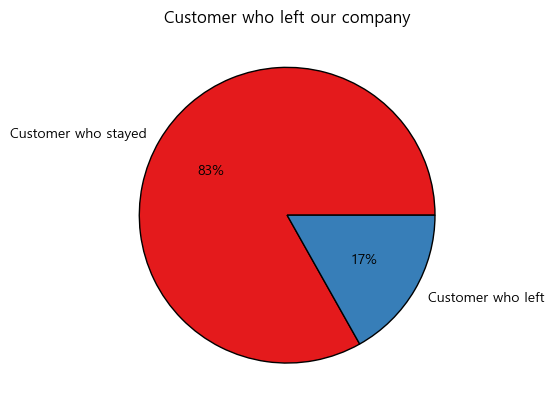

╭──────────────────────────────────────── CUSTOMERS WHO LEFT THE COMPANY ─────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 17% of total Customers left the company.

In [37]:
# Churn 데이터의 고객 이탈 여부 분포를 파이 차트로 시각화

# Churn 컬럼의 고유값(0,1)을 리스트로 추출
lab = Churn_Data["Churn"].value_counts().keys().tolist()
# 각 고유값의 빈도수를 리스트로 추출  
val = Churn_Data["Churn"].value_counts().values.tolist()

# 파이 차트의 레이블을 이해하기 쉽게 변경
lab = ['Customer who stayed', 'Customer who left']

# 파이 차트 생성
# - colors: Set1 색상 팔레트 사용
# - autopct: 각 영역의 비율을 %로 표시
# - wedgeprops: 영역 구분선을 검정색으로 설정
plt.pie(val, labels=lab, colors=sns.color_palette('Set1'), autopct='%.0f%%',wedgeprops=dict(edgecolor='black'))

# 차트 제목 설정
plt.title('Customer who left our company')

# 차트 출력
plt.show()

# Rich 라이브러리를 사용하여 인사이트 패널 출력
console = Console()
console.print(Panel("INSIGHTS", title="CUSTOMERS WHO LEFT THE COMPANY"))

# 전체 고객 중 이탈한 고객의 비율 출력
print(f'About 17% of total Customers left the company.')

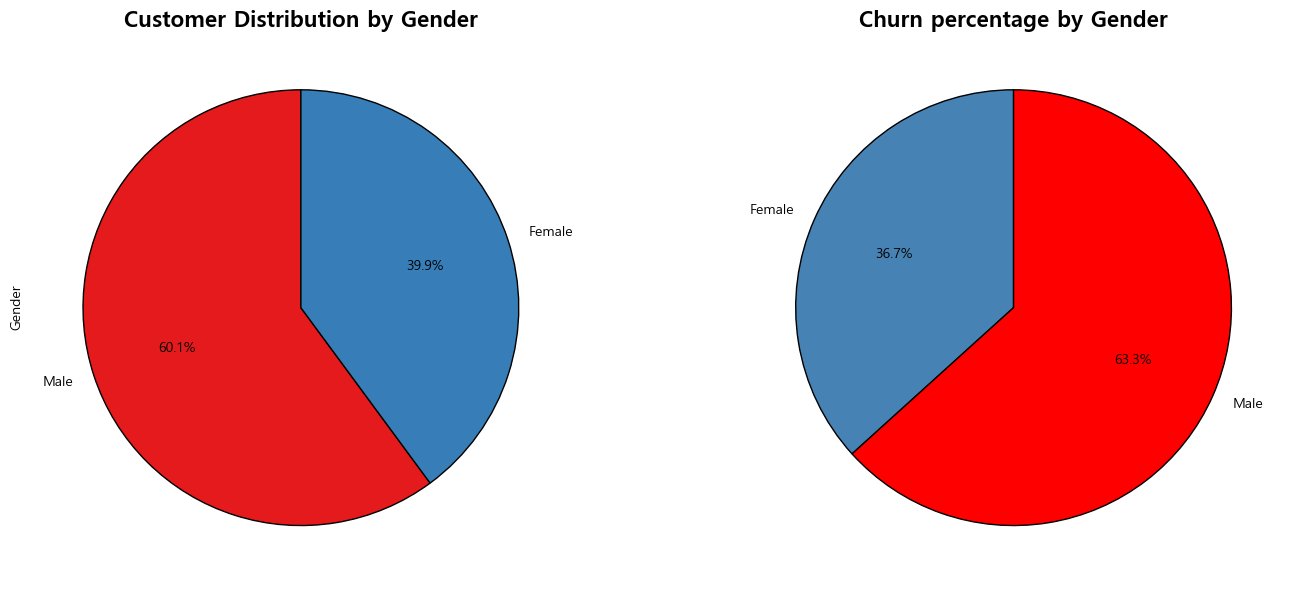

╭───────────────────────────────────────────── CHURN COUNT BY GENDER ─────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 60.1% of total customers are male and 39.9% are female. Out of the customers who left 63.3% are Male while 
36.7% are female.
Male Dominated Customer Base
Higher male churn rate
Males are more likely to churn compared to females in relative terms
Potential Target Area for Retention
The company must focus on improving male retention rate
Female Retention Appears Stronger
With the small female customer base, company is successfull in retaining them.

In [39]:
# Gender_Male 컬럼을 기반으로 'Gender' 컬럼 생성 (1=Male, 0=Female)
Churn_Data['Gender'] = Churn_Data['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# 1행 2열의 서브플롯 생성 (전체 크기 15x6)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 파이차트: 성별 분포 시각화
# - Gender 컬럼의 값 개수를 세어 비율 계산
# - 파이차트로 표현 (색상:Set1, 테두리:검정)
gender_counts = Churn_Data['Gender'].value_counts()
gender_counts.plot.pie(ax=axs[0], labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'), wedgeprops=dict(edgecolor='black'))
axs[0].set_title('Customer Distribution by Gender', fontsize=16, fontweight='bold')

# 두 번째 파이차트: 성별에 따른 이탈 고객 비율 시각화
# - Gender와 Churn으로 그룹화하여 이탈 고객수 계산
# - 파이차트로 표현 (색상:파랑/빨강, 테두리:검정)
churn_counts = Churn_Data.groupby('Gender')['Churn'].value_counts().unstack()
churn_counts.plot.pie(y=1,ax=axs[1], autopct='%1.1f%%', labels=churn_counts.index,startangle=90, colors=["steelblue", "red"], legend=False,wedgeprops=dict(edgecolor='black'))
axs[1].set_title('Churn percentage by Gender', fontsize=16, fontweight='bold')
axs[1].set_ylabel('')  # y축 레이블 제거

# 그래프 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

# Rich 라이브러리를 사용하여 인사이트 패널 생성
console = Console()
console.print(Panel("INSIGHTS", title="CHURN COUNT BY GENDER"))

# 분석 결과 출력
# - 전체 고객의 성별 비율
# - 이탈 고객의 성별 비율
# - 주요 인사이트
print(f"About 60.1% of total customers are male and 39.9% are female. Out of the customers who left 63.3% are Male while 36.7% are female.\n[bold red]Male Dominated Customer Base[/bold red]\n[bold red]Higher male churn rate[/bold red]\nMales are more likely to churn compared to females in relative terms\n[bold red]Potential Target Area for Retention[/bold red]\nThe company must focus on improving male retention rate\n[bold red]Female Retention Appears Stronger[/bold red]\nWith the small female customer base, company is successfull in retaining them.")


In [40]:
Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   CustomerID                           5630 non-null   int64   
 1   Churn                                5630 non-null   category
 2   Tenure                               5366 non-null   float64 
 3   CityTier                             5630 non-null   int64   
 4   WarehouseToHome                      5379 non-null   float64 
 5   HourSpendOnApp                       5375 non-null   float64 
 6   NumberOfDeviceRegistered             5630 non-null   int64   
 7   SatisfactionScore                    5630 non-null   category
 8   NumberOfAddress                      5630 non-null   category
 9   Complain                             5630 non-null   category
 10  OrderAmountHikeFromlastYear          5365 non-null   float64 
 11  CouponUsed       

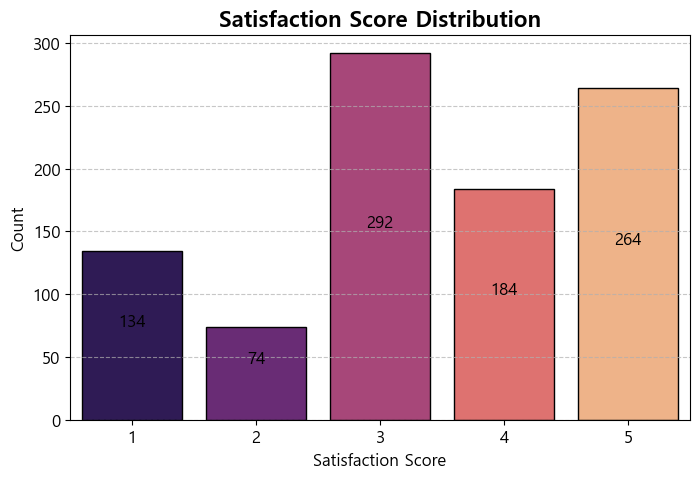

╭──────────────────────────────────────── SATISFACTION SCORE DISTRIBUTION ────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Most of the Customers who left rated the service with satisfaction score of 3.
About 21.94% of customers rated the service low while 78.06% rated the service average to high.
Customers with asatisfaction Score of 3
These customers are at the risk of leaving as they are not fully satisfied but haven't disengaged yet. The 
marketing strategy must focus on retaining these group of people, like providing them with personalised offers and 
surprise perks. Also it's important to collect their feedback.
Customers with low satisfaction scores
Much more aggresive actions should be taken for these groups, their complaints must be heard and addressed, and 
compensated.
Customers with high rating
These customers are more likely to stay. They must be rewarded with loyality and their engagement milestones should
be celebrated.

In [42]:
# 이탈한 고객과 유지된 고객 데이터 분리
Churn_Data_Y= Churn_Data[Churn_Data['Churn']==1] # 이탈 고객 데이터
Churn_Data_N= Churn_Data[Churn_Data['Churn']==0] # 유지 고객 데이터

# 만족도 점수 분포 시각화
plt.figure(figsize=(8, 5)) # 그래프 크기 설정
sns.countplot(x='SatisfactionScore', data=Churn_Data_Y, palette='magma', edgecolor='black') # 막대 그래프 생성
plt.title('Satisfaction Score Distribution', fontsize=16, fontweight='bold') # 제목 설정
plt.xlabel('Satisfaction Score', fontsize=12) # x축 레이블
plt.ylabel('Count', fontsize=12) # y축 레이블
plt.xticks(fontsize=12) # x축 눈금 폰트 크기
plt.yticks(fontsize=12) # y축 눈금 폰트 크기
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가

# 각 막대 위에 데이터 값 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()

# 인사이트 패널 생성 및 분석 결과 출력
console = Console()
console.print(Panel("INSIGHTS", title="SATISFACTION SCORE DISTRIBUTION"))

# 만족도 점수 분포에 대한 상세 분석 결과 출력
print(f"Most of the Customers who left rated the service with satisfaction score of 3.\nAbout {((134+74)/(134+74+292+184+264)*100):.2f}% of customers rated the service low while {((292+184+264)/(134+74+292+184+264))*100:.2f}% rated the service average to high.\n[bold red]Customers with asatisfaction Score of 3[/bold red]\nThese customers are at the risk of leaving as they are not fully satisfied but haven't disengaged yet. The marketing strategy must focus on retaining these group of people, like providing them with personalised offers and surprise perks. Also it's important to collect their feedback.\n[red bold]Customers with low satisfaction scores[/bold red]\nMuch more aggresive actions should be taken for these groups, their complaints must be heard and addressed, and compensated.\n[bold red]Customers with high rating[/bold red]\nThese customers are more likely to stay. They must be rewarded with loyality and their engagement milestones should be celebrated. ")


이탈한 고객들의 대부분이 서비스 만족도를 3점으로 평가했습니다.
약 21.94%의 고객이 서비스를 낮게 평가했고, 78.06%의 고객이 보통에서 높음으로 평가했습니다.
만족도 점수 3점을 준 고객들:
이 고객들은 완전히 만족하지는 않지만 아직 완전히 이탈하지 않은 상태로, 이탈 위험이 있는 그룹입니다.
마케팅 전략은 이 그룹의 유지에 집중해야 하며, 개인화된 혜택과 깜짝 특전을 제공하는 것이 좋습니다.
또한 이들의 피드백을 수집하는 것이 매우 중요합니다.
낮은 만족도 점수를 준 고객들:
이 그룹에 대해서는 더욱 적극적인 조치가 필요합니다.
그들의 불만사항을 경청하고 해결하며, 적절한 보상을 제공해야 합니다.
높은 만족도 점수를 준 고객들:
이 고객들은 계속 남아있을 가능성이 높습니다.
충성도에 대한 보상을 제공하고, 그들의 참여 이정표를 축하해주어야 합니다.

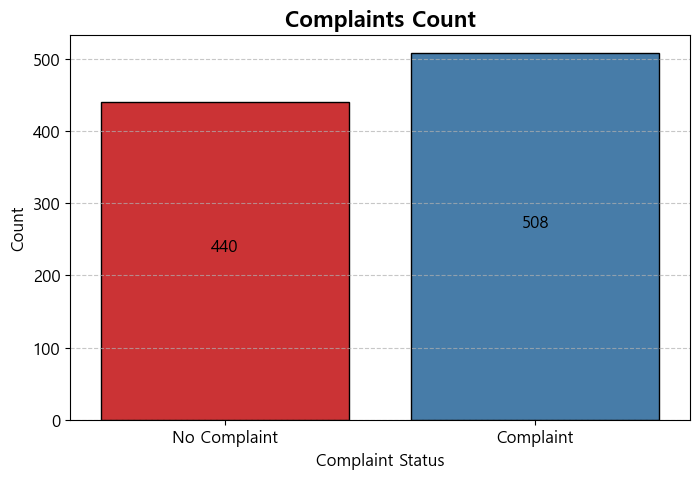

╭─────────────────────────────────────────────── COMPLAINTS COUNT ────────────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

About 53.59% of Customers who left filed complaints. while 46.41% never reported any complaints.
Improve customer service
More than half of customers who churned had filled a complaint. Complaints can be an indicator that a customer 
might churn, it is important to set effective strategies to deal with and resolve customer complaints. It is thus 
important to improve company's customer service.
Silent Churners
An intersting fact is that nearly half of the customers are silent churners , that means they never filed any 
complaints. This is an important issue that must be resolved. This means that company's complaint receiving system.
Company must find ways to engage these customers, may be providing regular satisfaction surveys. Company must not 
also solely depend on customer complaints to improve customer satisfaction but find other ways too

In [43]:
# Complaints Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Complain', data=Churn_Data_Y, palette='Set1', edgecolor='black')
plt.title('Complaints Count', fontsize=16, fontweight='bold')
plt.xlabel('Complaint Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Complaint', 'Complaint'], fontsize=12)  # Custom labels for better understanding
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()/2), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()


# Insights

console = Console()
console.print(Panel("INSIGHTS", title="COMPLAINTS COUNT"))

print(f"About {((508/(440+508))*100):.2f}% of Customers who left filed complaints. while {((440/(440+508))*100):.2f}% never reported any complaints.\n[bold red]Improve customer service\n[/bold red]More than half of customers who churned had filled a complaint. Complaints can be an indicator that a customer might churn, it is important to set effective strategies to deal with and resolve customer complaints. It is thus important to improve company's customer service.\n[bold red]Silent Churners[/bold red]\nAn intersting fact is that nearly half of the customers are silent churners , that means they never filed any complaints. This is an important issue that must be resolved. This means that company's complaint receiving system. Company must find ways to engage these customers, may be providing regular satisfaction surveys. Company must not also solely depend on customer complaints to improve customer satisfaction but find other ways too ")

이탈한 고객들 중 약 53.59%가 불만을 제기했고, 46.41%는 어떠한 불만도 제기하지 않았습니다.
고객 서비스 개선:
이탈한 고객의 절반 이상이 불만을 제기했다는 점은 주목할 만합니다.
불만 제기는 고객 이탈의 중요한 신호가 될 수 있습니다.
따라서 고객 불만을 효과적으로 처리하고 해결하기 위한 전략을 수립하는 것이 중요합니다.
회사의 전반적인 고객 서비스 품질을 개선하는 것이 필수적입니다.
조용한 이탈자들(Silent Churners):
거의 절반에 달하는 고객들이 아무런 불만 제기 없이 이탈했다는 점이 흥미롭습니다.
이는 회사의 불만 접수 시스템에 문제가 있을 수 있다는 것을 시사합니다.
회사는 이러한 고객들과 소통할 수 있는 방법을 찾아야 합니다.
예: 정기적인 만족도 설문조사 실시
고객 만족도 개선을 위해 불만 접수에만 의존하지 말고 다양한 방법을 모색해야 합니다.

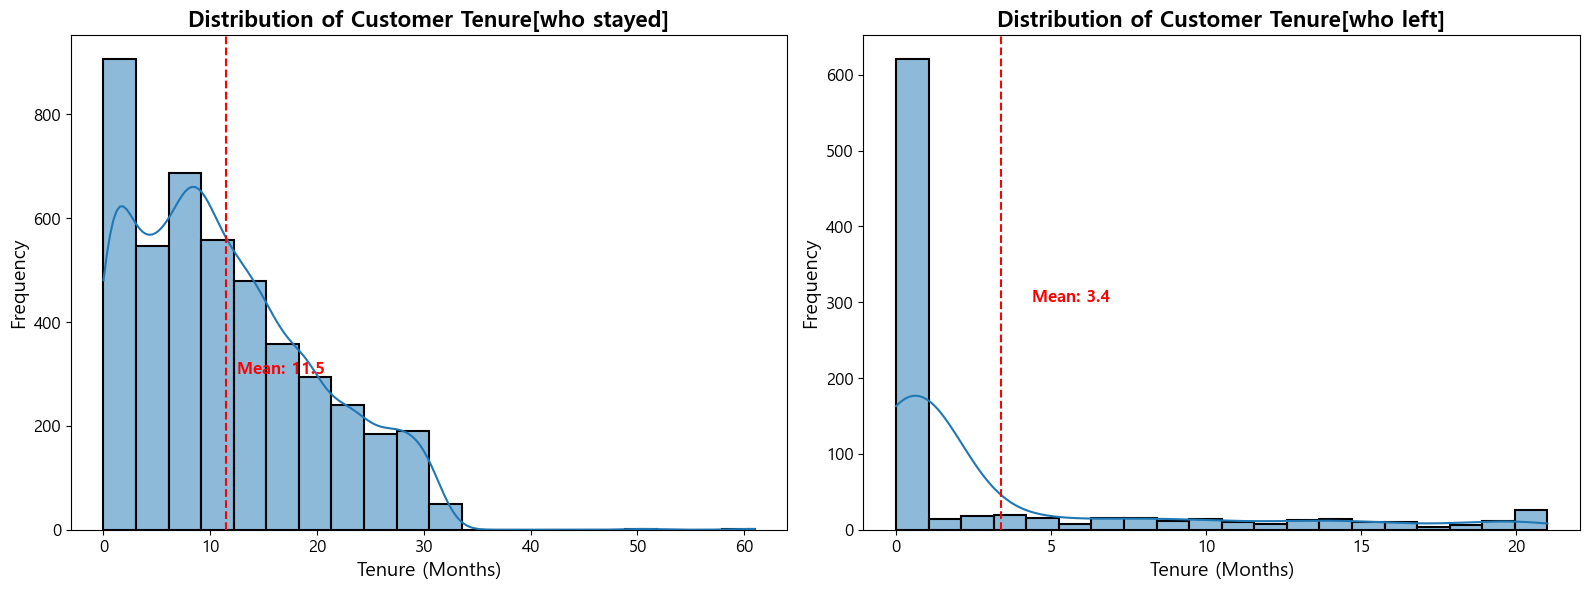

╭──────────────────────────────────────── DISTRIBUTION OF CUSTOMER TENURE ────────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

The mean value of tenure for customers who left is 3.4 and it is right skewed. While the mean fo who stayed is 11.5
Significant difference in tenure
Customers who stay tend to have a longer engagement with the service.
Focus on short term Customers
Most customers tend to leave before 3.4 months.We must focus on making our customers remain satisfied in the early 
months, ensure their engagement through providing with welcome package and offers. Provide them with loyalty 
rewards and celebrate their engagement milestones. They must be provided with personalized offers.Conduct 
satisfaction surveys and monito the new customers closely in their early periods.
Customers with long term tenure
There are a small percentage of customers who leave who have high tenure. They must be provided with personalized 
offers, loyalty programs, refferal programs and so on

In [44]:
# Distribution of Tenure customers who stayed
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
sns.histplot(Churn_Data_N['Tenure'], bins=20, kde=True, color='#1f77b4', edgecolor='black', linewidth=1.5,ax=axs[0])
axs[0].set_title('Distribution of Customer Tenure[who stayed]', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Tenure (Months)', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_tenure = Churn_Data_N['Tenure'].mean()
axs[0].axvline(mean_tenure, color='red', linestyle='--', linewidth=1.5)
axs[0].text(mean_tenure + 1, 300, f'Mean: {mean_tenure:.1f}', color='red', fontsize=12, fontweight='bold')

# Distribution of Tenure of customers who left
sns.histplot(Churn_Data_Y['Tenure'], bins=20, kde=True, color='#1f77b4', edgecolor='black', linewidth=1.5,ax=axs[1])
axs[1].set_title('Distribution of Customer Tenure[who left]', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Tenure (Months)', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_tenure = Churn_Data_Y['Tenure'].mean()
axs[1].axvline(mean_tenure, color='red', linestyle='--', linewidth=1.5)
axs[1].text(mean_tenure + 1, 300, f'Mean: {mean_tenure:.1f}', color='red', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



# Insights

console = Console()
console.print(Panel("INSIGHTS", title="DISTRIBUTION OF CUSTOMER TENURE"))
print(f"The mean value of tenure for customers who left is 3.4 and it is right skewed. While the mean fo who stayed is 11.5\n[bold red]Significant difference in tenure[/bold red]\nCustomers who stay tend to have a longer engagement with the service.\n[bold red]Focus on short term Customers[/bold red]\nMost customers tend to leave before 3.4 months.We must focus on making our customers remain satisfied in the early months, ensure their engagement through providing with welcome package and offers. Provide them with loyalty rewards and celebrate their engagement milestones. They must be provided with personalized offers.Conduct satisfaction surveys and monito the new customers closely in their early periods.\n[bold red]Customers with long term tenure[/bold red]\nThere are a small percentage of customers who leave who have high tenure. They must be provided with personalized offers, loyalty programs, refferal programs and so on")

이탈한 고객들의 평균 재직 기간은 3.4개월이며 오른쪽으로 치우친 분포를 보입니다. 반면 유지된 고객들의 평균 재직 기간은 11.5개월입니다.
재직 기간의 큰 차이:
서비스를 계속 이용하는 고객들은 더 긴 재직 기간을 보이는 경향이 있습니다.
단기 고객들에 대한 집중:
대부분의 고객들이 3.4개월 이전에 이탈하는 경향이 있습니다.
초기 몇 개월 동안 고객 만족도 유지에 집중해야 합니다:
웰컴 패키지와 특별 혜택 제공
충성도 보상 프로그램 운영
고객 참여 이정표 축하
개인화된 혜택 제공
만족도 설문 실시
신규 고객 초기 이용 패턴 면밀히 모니터링
장기 재직 고객들:
소수이지만 장기 재직 후 이탈하는 고객들이 있습니다.
이들을 위한 특별 관리가 필요합니다:
개인화된 혜택 제공
충성도 프로그램 운영
추천 프로그램 등 다양한 혜택 제공

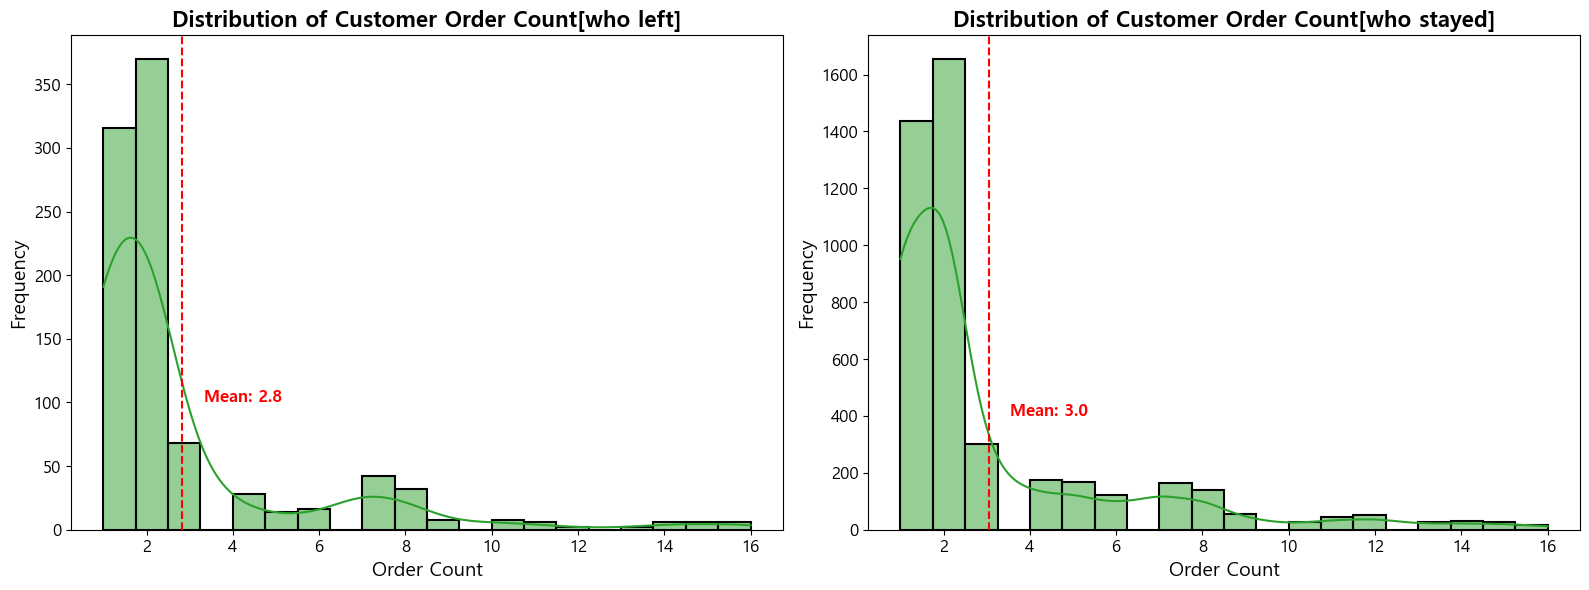

╭───────────────────────────────────── DISTRIBUTION OF CUSTOMER ORDER COUNT ──────────────────────────────────────╮
│ INSIGHTS                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

The mean value of Customer Order Count for customers who stayed is 3 and who left is 2.8.
Slight Difference in Order Count
Although the difference seems small, it indicates that customers who left had slightly fewer orders on average.
Potential Early Warning Indicator
The lower average order count can be an early indicator that customer might churn. We can monitor customer order 
pattern in this case.

In [45]:
# Distribution of Order Count of customers who left
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Distribution of Order Count of Customers who left
sns.histplot(Churn_Data_Y['OrderCount'], bins=20, kde=True, color='#2ca02c', edgecolor='black', linewidth=1.5,ax=axs[0])
axs[0].set_title('Distribution of Customer Order Count[who left]', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Order Count', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_ordercount = Churn_Data_Y['OrderCount'].mean()
axs[0].axvline(mean_ordercount, color='red', linestyle='--', linewidth=1.5)
axs[0].text(mean_ordercount + 0.5, 100, f'Mean: {mean_ordercount:.1f}', color='red', fontsize=12, fontweight='bold')



# Distribution of Order Count of Customers who stayed
sns.histplot(Churn_Data_N['OrderCount'], bins=20, kde=True, color='#2ca02c', edgecolor='black', linewidth=1.5,ax=axs[1])
axs[1].set_title('Distribution of Customer Order Count[who stayed]', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Order Count', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
# Adding annotations (mean)
mean_ordercount = Churn_Data_N['OrderCount'].mean()
axs[1].axvline(mean_ordercount, color='red', linestyle='--', linewidth=1.5)
axs[1].text(mean_ordercount + 0.5, 400, f'Mean: {mean_ordercount:.1f}', color='red', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Insights

console = Console()
console.print(Panel("INSIGHTS", title="DISTRIBUTION OF CUSTOMER ORDER COUNT"))

print(f"The mean value of Customer Order Count for customers who stayed is 3 and who left is 2.8.\n[bold red]Slight Difference in Order Count[/bold red]\nAlthough the difference seems small, it indicates that customers who left had slightly fewer orders on average.\n[bold red]Potential Early Warning Indicator[/bold red]\nThe lower average order count can be an early indicator that customer might churn. We can monitor customer order pattern in this case.")

이 분석 결과를 한국어로 설명드리겠습니다:
주문 횟수 평균 비교:
유지된 고객의 평균 주문 횟수는 3회
이탈한 고객의 평균 주문 횟수는 2.8회
주문 횟수의 작은 차이:
차이가 작아 보일 수 있지만, 이탈한 고객들이 평균적으로 더 적은 주문을 했다는 것을 보여줍니다.
잠재적 조기 경고 지표:
낮은 주문 횟수는 고객이 이탈할 수 있다는 조기 경고 신호가 될 수 있습니다.
이러한 경우에 고객의 주문 패턴을 모니터링하여 이탈을 예방할 수 있습니다.
이는 고객 관리에 있어 주문 패턴 모니터링의 중요성을 보여주는 중요한 인사이트입니다.

In [46]:
# 데이터 타입 변환 및 요약 통계 생성
# 범주형 변수들을 정수형으로 변환
Churn_Data['Churn'] = Churn_Data['Churn'].astype('int64')  # 이탈 여부를 정수형으로 변환 
Churn_Data['SatisfactionScore'] = Churn_Data['SatisfactionScore'].astype('int64')  # 만족도 점수를 정수형으로 변환
Churn_Data['NumberOfAddress'] = Churn_Data['NumberOfAddress'].astype('int64')  # 주소 수를 정수형으로 변환
Churn_Data['Complain'] = Churn_Data['Complain'].astype('int64')  # 불만 제기 여부를 정수형으로 변환

# 전체 데이터셋의 요약 통계량 계산 (평균, 표준편차, 최소값, 최대값 등)
summary = Churn_Data.describe().transpose()
summary  # 요약 통계량 출력

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [47]:
Churn_Data_numeric = Churn_Data.select_dtypes(include=['number'])

#correlation
correlation = Churn_Data_numeric.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [48]:
#convert to array
corr_array  = np.array(correlation)

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 8722 missing from current font.

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 8722 missing from current font.



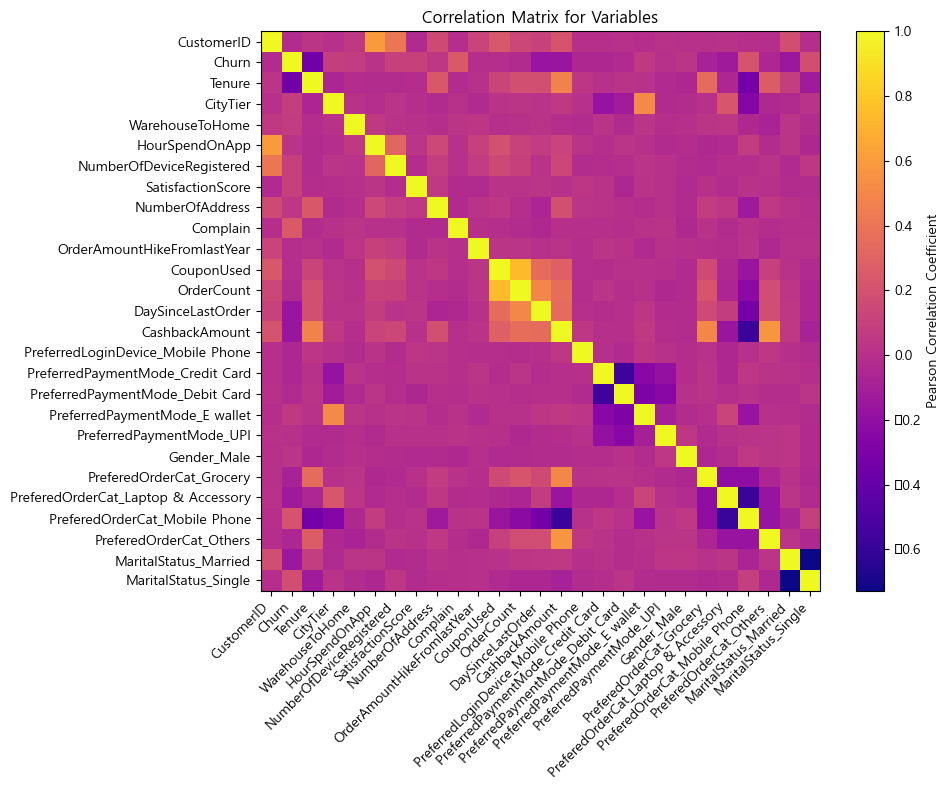

In [50]:
# First install required package
!pip install nbformat>=4.2.0

# Plotting the Heatmap
trace = go.Heatmap(
    z = corr_array,
    x = matrix_cols,
    y = matrix_cols,
    colorscale = "Plasma", 
    colorbar=dict(
        title="Pearson Correlation Coefficient",
        titleside="right",
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticks="outside"
    ),
    hovertemplate = 'X: %{x}<br>Y: %{y}<br>Correlation: %{z:.2f}',  # Adding detailed hover information as there are lot of features
)

# Layout of the Heatmap
layout = go.Layout(
    title=dict(
        text="Correlation Matrix for Variables", 
        x=0.5,  # Centering the title
        font=dict(size=16, color='black')
    ),
    autosize=False,
    height=800,
    width=850,
    margin=dict(r=20, l=150, t=50, b=150),  # Optimized margins for better spacing
    
    xaxis=dict(
        tickfont=dict(size=10), 
        title="Features",  
        titlefont=dict(size=12)
    ),
    yaxis=dict(
        tickfont=dict(size=10), 
        title="Features",  # Added axis title
        titlefont=dict(size=12)
    ),
    hovermode='closest',  # Enhanced hover mode for better interactivity
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot the heatmap using plt instead of plotly since nbformat is missing
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(corr_array, cmap='plasma')
plt.colorbar(label='Pearson Correlation Coefficient')
plt.xticks(range(len(matrix_cols)), matrix_cols, rotation=45, ha='right')
plt.yticks(range(len(matrix_cols)), matrix_cols)
plt.title('Correlation Matrix for Variables')
plt.tight_layout()
plt.show()

# MODELLING

In [51]:
# Training using data
X=Churn_Data_imputed.drop("Churn",axis=1)
y=Churn_Data_imputed["Churn"]
from  sklearn import tree
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=342)

In [52]:
# Training the model with Data
from rfpimp import *
model=tree.DecisionTreeClassifier(random_state=24)
model.fit(X_train,y_train)

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



DecisionTreeClassifier(random_state=24)

In [53]:
from rich.text import Text
console = Console()

# Define the scores
training_score = f'{model.score(X_train,y_train):.2%}%'
testing_score = f'{model.score(X_test,y_test):.2%}%'

# Create stylized text for Training and Testing scores
training_text = Text("T H E   T R A I N I N G   S C O R E   O F   M O D E L :", style="bold green")
training_text.append(f" {training_score}", style="bold yellow")

testing_text = Text("T H E   T E S T I N G   S C O R E   O F   M O D E L :", style="bold green")
testing_text.append(f" {testing_score}", style="bold yellow")

# Display the results in panels
console.print(Panel(training_text, title="TRAINING SCORE", title_align="left", border_style="green"))
console.print(Panel(testing_text, title="TESTING SCORE", title_align="left", border_style="green"))

╭─ TRAINING SCORE ────────────────────────────────────────────────────────────────────────────────────────────────╮
│ T H E   T R A I N I N G   S C O R E   O F   M O D E L : 100.00%%                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ TESTING SCORE ─────────────────────────────────────────────────────────────────────────────────────────────────╮
│ T H E   T E S T I N G   S C O R E   O F   M O D E L : 95.24%%                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [54]:
prediction=model.predict(X_test)
prediction_df = pd.DataFrame(prediction, columns=['Predicted'])
result_df = pd.concat([X_test.reset_index(drop=True), prediction_df], axis=1)
result_df.head()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Predicted
0,50802.0,16.000000,3.0,10.0,2.0,4.0,2.0,4.0,0.0,14.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50109.0,23.000000,3.0,6.0,3.0,3.0,2.0,4.0,0.0,14.953383,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,50638.0,4.409178,1.0,8.0,2.0,3.0,5.0,7.0,1.0,14.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,52751.0,4.000000,1.0,16.0,2.0,3.0,3.0,5.0,0.0,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50809.0,7.518523,1.0,6.0,2.0,3.0,5.0,3.0,0.0,11.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

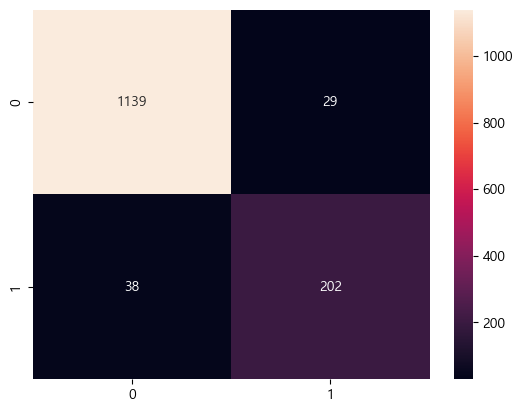

In [55]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(prediction, y_test), annot = True,fmt=".5g")

In [57]:
# Feature Importance
feature_importances = model.feature_importances_
rea = pd.Series(index=X_train.columns, data=model.feature_importances_)
sorted_features = rea.sort_values(ascending=False)
df = pd.DataFrame(sorted_features)

In [ ]:
rea=pd.Series(index=model.feature_names_in_,data=model.feature_importances_)
import matplotlib.pyplot as plt
plt.barh(rea.sort_values().index,rea.sort_values())
plt.title("FEATURE IMPORTANCE",fontsize=14)